In [279]:
import numpy as np
import scipy.stats as sps
from math import *
import matplotlib.pyplot as plt

In [280]:
def show_pdf(pdf,  xmin, xmax, ymax, grid_size, distr_name, **kwargs):
    """
    Рисует график плотности непрерывного распределения
    pdf - плотность
    xmin, xmax - границы графика по оси x
    ymax - граница графика по оси y
    grid_size - размер сетки, по которой рисуется график
    distr_name - название распределения
    kwargs - параметры плотности
    """
    
    grid = np.linspace(xmin, xmax, grid_size)  
    plt.figure(figsize=(12, 5))
    plt.plot(grid, pdf(grid, **kwargs), lw=5)
    plt.grid(ls=':')
    plt.xlabel('Значение', fontsize=18)
    plt.ylabel('Плотность', fontsize=18)
    plt.xlim((xmin, xmax))
    plt.ylim((None, ymax))
    title = 'Плотность {}'.format(distr_name)
    plt.title(title.format(**kwargs), fontsize=20)
    plt.show()

# Домашняя работа №4

**№1.** О непрерывной равномерно распределенной случайной величине X известно, что ее дисперсия равна 0.2. Можно ли найти правую границу величины X и ее среднее значение зная, что левая граница равна 0.5? Если да, найдите ее.

Пусть $X\sim R[a,b]$, $D(X) = 0,2$, $a = 0,5$. Найдем $b$ и $\overline{X}$.

1) Так как $D(X) = \frac{(b-a)^2}{12} = 0,2$, то отсюда

$(b - 0,5)^2 = 2,4$, и $b = \sqrt{2,4} + 0,5$.

In [281]:
a = 0.5
b = sqrt(12*0.2) + 0.5
print(f' b = {b}')

 b = 2.049193338482967


2) Так как $\overline{X} = \frac{a+b}{2}$, то $\overline{X} = \frac{0,5 + \sqrt{2,4} + 0,5}{2} = \frac{1 + \sqrt{2,4}}{2}$.

In [282]:
MX = (a+b)/2
print(f'Среднее значение: {MX}')

Среднее значение: 1.2745966692414834


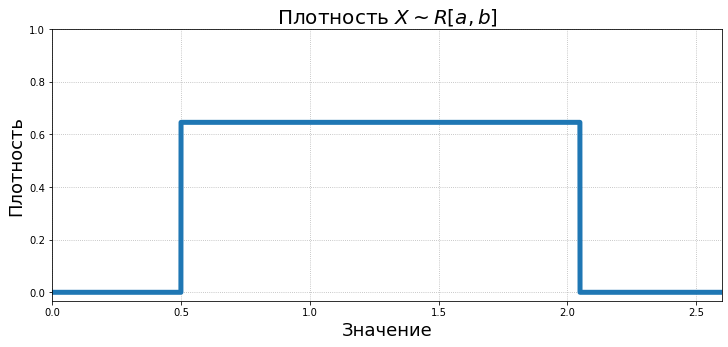

In [283]:
# визуализируем график плотности
show_pdf(
    pdf=sps.uniform.pdf, xmin=0, xmax=2.6, ymax=1, grid_size=10000, 
    distr_name=r'$X\sim R[a, b]$', loc=a, scale=b-a
)

**№2.** Рост взрослого населения города `X` имеет нормальное распределение, причем, средний рост равен 174 см, а среднее квадратическое отклонение равно 8 см. посчитайте, какова вероятность того, что случайным образом выбранный взрослый человек имеет рост:
1. больше 182 см?
2. больше 190 см?
3. от 166 см до 190 см?
4. от 166 см до 182 см?
5. от 158 см до 190 см?
6. не выше 150 см или не ниже 190 см?
7. не выше 150 см или не ниже 198 см?
8. ниже 166 см?

Задачу можно решить двумя способами: без использования сторонних библиотек (`numpy`, `scipy`, `pandas` и пр.), а затем проверить себя с помощью встроенных функций

Пусть $X \sim N(a = 174, \sigma = 8)$. Найдем вероятности, используя следующие формулы:

$P(\alpha < X < \beta) = \Phi(\frac{\beta - a}{\sigma}) - \Phi(\frac{\alpha - a}{\sigma})$, где $\Phi(x)$ -- функция Лапласа.

1)	$P(X > 182) = 1 - P(- \infty < X <= 182) = 1 - ( \Phi(\frac{182 - 174}{8}) - \Phi(\frac{-\infty - 174}{8})) = 1 - ( \Phi(1) - \Phi(-\infty)) = 1 - (\Phi(1) + \Phi(\infty)) = 1 - (\Phi(1) + 0.5) = 0.5 - \Phi(1) = 0.5 - 0.3413 = 0.1587$.

2) $P(X > 190) = 1 – P(- \infty <X<=190) = 1 - (\Phi(\frac{190 - 174}{8} - \Phi(\frac{-\infty - 174}{8})) = 1 - (\Phi(2) + 0.5) = 0.5 - 0.4772 = 0.0228$.


3)	$P(166 < X < 190) = \Phi(\frac{190-174}{8}) - \Phi(\frac{166-174}{8})= \Phi(2) - \Phi(-1) = \Phi(2) + \Phi(1) = 0.4772 + 0.3413 = 0.8185$.

4) $P(166 < X < 182) = \Phi(\frac{182-174}{8}) - \Phi(\frac{166-174}{8})= \Phi(1) - \Phi(-1) = \Phi(1) + \Phi(1) = 0.3413 + 0.3413 = 0.6826$.

5)  $P(158 < X < 190) = \Phi(\frac{190-174}{8}) - \Phi(\frac{158-174}{8})= \Phi(2) - \Phi(-2) = \Phi(2) + \Phi(2) = 0.4772 + 0.4772 = 0.9544$.

6) $P(X \leq 150) + P(X \geq 190) = P(X \leq 150) + 1 - P (X < 190) = \Phi(\frac{150-174}{8}) + 0.5 + 1 - (\Phi(\frac{190-174}{8} + 0.5) = \Phi(-3) + 0.5 + 1 - \Phi(2) - 0.5 = 1 - 0.49865 - 0.4772 = 0.0241$.

7) $P(X \leq 150) + P(X \geq 198) = \Phi(\frac{150-174}{8}) + 0.5 + 1 - P(X < 198) = \Phi(\frac{150-174}{8}) + 1.5 - (\Phi(\frac{198-174}{8} + 0.5) = \Phi(-3) + 1.5 - \Phi(3) - 0.5 = - 2 \cdot \Phi(3) + 1 = - 2 * 0.49865 + 1 = 0.0027$.

8) $P(X < 166) = P(- \infty < X < 166) =  \Phi(\frac{166-174}{8}) - \Phi(\frac{- \infty -174}{8}) = \Phi(-1) - \Phi(-\infty) = - \Phi(1) + \Phi(\infty) = -0.3413 + 0.5 = 0.1587$.

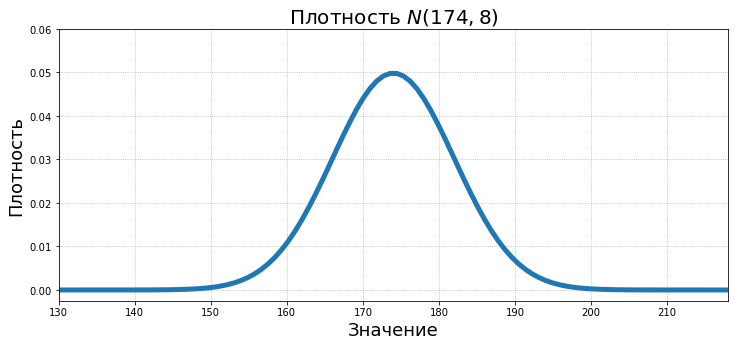

In [284]:
# задаем распределение
sample = sps.norm(loc=174, scale=8)
show_pdf(
    pdf=sps.norm.pdf, xmin=130, xmax=218, ymax=0.06, grid_size=100, 
    distr_name=r'$N(174, 8)$', loc=174, scale=8
)

In [285]:
# находим вероятности с помощью встроенных библиотек
P1 = 1 - sample.cdf(182)

P2 = 1 - sample.cdf(190)

P3 = sample.cdf(190) - sample.cdf(166)

P4 = sample.cdf(182) - sample.cdf(166)

P5 = sample.cdf(190) - sample.cdf(158)

P6 = sample.cdf(150) + 1 - sample.cdf(190)

P7 = sample.cdf(150) + 1 - sample.cdf(198)

P8 = sample.cdf(166)


print(f' 1) {P1}, 2) {P2}, 3) {P3}, 4) {P4}, \n 5) {P5}, 6) {P6}, 7) {P7}, 8) {P8}')

 1) 0.15865525393145707, 2) 0.02275013194817921, 3) 0.8185946141203637, 4) 0.6826894921370859, 
 5) 0.9544997361036416, 6) 0.0241000299798092, 7) 0.002699796063260096, 8) 0.15865525393145707


**№3.(Дополнительно)** Коробки с шоколадом упаковываются автоматически. Их средняя масса равна 1.06 кг. Известно, что 5% коробок имеют массу, меньшую 1 кг. Найдите: а) среднее квадратическое отклонение массы коробки, б) процент коробок, имеющих массу больше 1.1 кг.

_Подсказка_. 1. Можно считать, что распределение массы коробки нормальное. 2. Найдите такое значение `scale`, для которого значение `cdf(x=1, loc=1.06, scale=scale)` близко к 0.05. Точности 0.0001 будет достаточно.

1) Пусть $X \sim N(a = 1.06, \sigma = x)$. По условию $P(X < 1) = F(1) = 0.05$.

In [286]:
a = 1.06
x = 0.03660
sample = sps.norm(loc=a, scale=x)
P = sample.cdf(1)

while P - 0.05 > 0.0001:
    x = x - 0.00001
    P = sps.norm(loc=a, scale=x).cdf(1)

print(f'1) Среднее квадратическое отклонение массы коробки: {x} кг')

1) Среднее квадратическое отклонение массы коробки: 0.03648999999999997 кг


2) $P(X > 1.1) = 1 - P(X <= 1.1) = 1 - F(1.1)$.

In [287]:
P = 1 - sps.norm(loc=1.06, scale=0.03649).cdf(1.1)
print(f'2) Процент коробок с массой более 1.1 кг: {P*100}%')

2) Процент коробок с массой более 1.1 кг: 13.64976561876875%


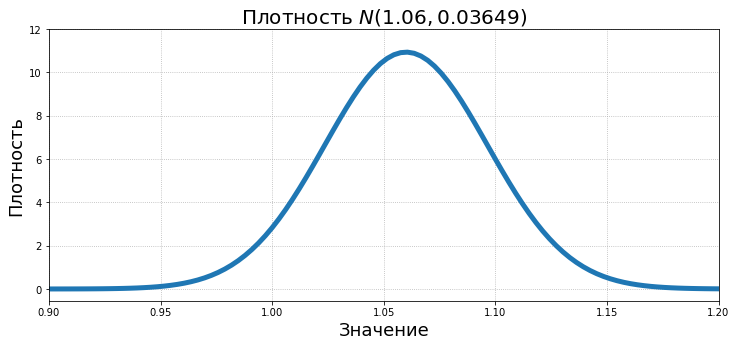

In [288]:
# задаем распределение
sample = sps.norm(loc=1.06, scale=0.03649)
show_pdf(
    pdf=sps.norm.pdf, xmin=0.9, xmax=1.2, ymax=12, grid_size=100, 
    distr_name=r'$N({loc}, {scale})$', loc=1.06, scale=0.03649
)